<a href="https://colab.research.google.com/github/DFCZVasya/mat_stat_task/blob/main/MatStatTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Первое задание

In [293]:
from google.colab import output
output.enable_custom_widget_manager()

In [294]:
import math
import numpy as np
from scipy.stats import norm, kstwobign
from scipy.stats.distributions import chi2, t, f

In [295]:
data = [-1.736, -0.550, -1.637, -1.896, -1.123, -1.649, -0.736, 0.372, -1.744, -0.723,
-1.794, -1.130, -1.428, -1.757, -1.914, -1.333, -1.622, -1.127, -0.733, -0.235,
0.571, -0.285, -1.875, 1.439, -2.456, -0.315, 0.096, 0.067, -0.922, -0.494,
-0.619, -0.730, -2.073, -2.271, -1.844, 0.498, -0.474, -0.211, -0.319, -0.595,
-2.647, -1.198, -1.479, 0.336, -0.259, -0.160, -1.701, -2.505, -1.641, -0.720]


In [296]:
data = np.array(data)
mean = data.mean()

In [297]:
mean

-0.9856199999999999

In [298]:
S_2 = ((data - mean)**2).mean()

In [299]:
S_2

0.7997957555999998

## a) для $α$, если $σ^2$ известно(0.7)

$\bar{x}$ ~ $N(α, \frac{σ^2}{n})$

$G(\overrightarrow{x}, α)$ = $\frac{\bar{x} - α}{\sqrt{\frac{\sigma^2}{n}}}$ ~ N(0, 1)

$P(t_1 \leq \frac{\bar{x} - α}{\sqrt{\frac{\sigma^2}{n}}} \leq t_2) = 1-𝛆$

$Φ(t_1) = \frac{𝛆}{2}$

$Φ(t_2) = 1 - \frac{𝛆}{2}$

$P(\bar{x} - \frac{\sigma t_2}{\sqrt{n}} \leq α \leq \bar{x} + \frac{\sigma t_2}{\sqrt{n}}) = 1 - 𝛆$

In [300]:
def confidenceInterval(eps):
  sigma = math.sqrt(0.7)
  n = 50
  t2 = norm.ppf(1 - eps / 2)

  sigma_minus = mean - sigma*t2/math.sqrt(n)
  sigma_plus = mean + sigma*t2/math.sqrt(n)
  print("Доверительный интервал уровня ", 1 - eps)
  print('(', sigma_minus , ',', sigma_plus, ')')

In [301]:
confidenceInterval(0.06)

Доверительный интервал уровня  0.94
( -1.208158500827332 , -0.763081499172668 )


##б)для $α$, если $σ^2$ неизвестно

$G(\overrightarrow{x}, α)$ = $\frac{(\bar{x} - \alpha)\sqrt{n}}{S_0}$ ~ $T_{n-1}$

$T_{n-1}(t_1) = \frac{𝛆}{2}$

$T_{n-1}(t_2) = 1 -\frac{𝛆}{2}$

$P(t_1 \leq \frac{(\bar{x} - \alpha)\sqrt{n}}{S_0} \leq t_2) = 1-𝛆$

$P(\bar{x} - \frac{t2 S_0}{\sqrt{n}} \leq α \leq \bar{x} + \frac{t2 S_0}{\sqrt{n}})$

In [302]:
def confidenceInterval(eps):
  n = 50
  S0 = math.sqrt(n * S_2 / (n - 1))
  t2 = t.ppf(1 - eps / 2, n - 1)  
  sigma_minus = mean - t2*S0/math.sqrt(n)
  sigma_plus = mean + t2*S0/math.sqrt(n)
  print("Доверительный интервал уровня ", 1 - eps)
  print('(', sigma_minus , ',', sigma_plus, ')')


In [303]:
confidenceInterval(0.06)

Доверительный интервал уровня  0.94
( -1.2316005586514067 , -0.7396394413485933 )


##в)для $\sigma^2$, если $α$ известно(-1)

$\frac{x_i - α}{σ}$ ~ N(0, 1)

$\sum_{i = 1}^{n}(\frac{x_i - α}{σ})^2$ ~ $χ_{n}^2$

$χ_{n}^2(t_1) = \frac{𝛆}{2}$

$χ_{n}^2(t_2) = 1 -\frac{𝛆}{2}$

$P(t_1 \leq \sum_{i = 1}^{n}(\frac{x_i - α}{σ})^2 \leq t_2) = 1- 𝛆$

$P(\frac{\sum_{i = 1}^{n}(x_i - α)^2}{t_2} \leq \sigma^2 \leq \frac{\sum_{i = 1}^{n}(x_i - α)^2}{t_1}) = 1 - 𝛆$

In [304]:
def confidenceInterval(eps):
  n = 50
  t1 = chi2.ppf(eps / 2, n)
  t2 = chi2.ppf(1 - eps / 2, n)
  a = -1

  sum = 0.0
  for num in data:
    sum += math.pow(num - a, 2)

  sigma_minus = sum / t2
  sigma_plus = sum / t1
  print("Доверительный интервал уровня ", 1 - eps)
  print('(', sigma_minus , ',', sigma_plus, ')')

In [305]:
confidenceInterval(0.06)

Доверительный интервал уровня  0.94
( 0.5679981665368425 , 1.2139308146482426 )


##г)для $\sigma^2$, если $α$ неизвестно

$G(\overrightarrow{x}, \sigma^2)$ = $\frac{n S^2}{\sigma^2}$ ~ $χ^2_{n - 1}$

$P(t_1 \leq \frac{n S^2}{\sigma^2} \leq t_2) = 1 - 𝛆$

$χ_{n - 1}^2(t_1) = \frac{𝛆}{2}$

$χ_{n - 1}^2(t_2) = 1 -\frac{𝛆}{2}$

$P(\frac{n S^2}{t_2} \leq \sigma^2 \leq \frac{n S^2}{t_1}) = 1 - 𝛆$

In [306]:
def confidenceInterval(eps):
  n = 50
  t1 = chi2.ppf(eps / 2, n - 1)
  t2 = chi2.ppf(1 - eps / 2, n - 1)

  sigma_minus = n * S_2 / t2
  sigma_plus = n * S_2 / t1
  print("Доверительный интервал уровня ", 1 - eps)
  print('(', sigma_minus , ',', sigma_plus, ')')

In [307]:
confidenceInterval(0.06)

Доверительный интервал уровня  0.94
( 0.5776104841353987 , 1.2442154564435666 )


#Второе задание



In [308]:
data1 = [-1.736, -0.550, -1.637, -1.896, -1.123, -1.649, -0.736, 0.372, -1.744, -0.723,
-1.794, -1.130, -1.428, -1.757, -1.914, -1.333, -1.622, -1.127, -0.733, -0.235]

data2 = [0.571, -0.285, -1.875, 1.439, -2.456, -0.315, 0.096, 0.067, -0.922, -0.494,
-0.619, -0.730, -2.073, -2.271, -1.844, 0.498, -0.474, -0.211, -0.319, -0.595,
-2.647, -1.198, -1.479, 0.336, -0.259, -0.160, -1.701, -2.505, -1.641, -0.720]

##a)о совпадении дисперсий


In [309]:
mean1 = np.array(data1).mean()
mean2 = np.array(data2).mean()
S1_2 = ((data1 - mean1)**2).mean()
S2_2 = ((data2 - mean2)**2).mean()

$\frac{nS^2_1}{σ^2_1}$ ~ $ χ^2_{n-1}$

$\frac{mS^2_2}{σ^2_2}$ ~ $ χ^2_{m-1}$

Эти случайные величины независимы, значит из них можно построить случайную величину, имеющую распределение Фишера

$\frac {1}{n-1} \frac{nS^2_1}{σ^2_1} : \frac {1}{m-1} \frac{mS^2_2}{σ^2_2} = \frac{n(m-1)\sigma^2_2 S^2_1}{m(n-1)\sigma^2_1 S^2_2}$ ~ $F_{n-1, m-1}$

$\eta = \frac{n(m-1)\ S^2_1}{m(n-1)\ S^2_2}$ ~ $F_{n-1, m-1}$

$P(q_1 < η < q_2) = 1 - 𝛆$

$F_{n-1, m-1}(q_1) = \frac{𝛆}{2}$

$F_{n-1, m-1}(q_2) = 1 - \frac{𝛆}{2}$

In [310]:
n = 20
m = 30
epsilon = 0.06
q1 = f.ppf(eps/2, n - 1, m - 1)
q2 = f.ppf(1 - eps/2, n - 1, m - 1)
eta = (n * (m - 1) * S1_2) / (m * (n - 1) * S2_2)

if (q1 < eta < q2):
  print("Гипотезу принимаем")
else:
  print("Гипотезу не принимаем")   

Гипотезу принимаем


##б)о совпадении средних, если известно, что дисперсии совпадают

$\bar{X}$ ~ $N(α_1, \frac{\sigma^2}{n})$ 

$\bar{Y}$ ~ $N(α_2, \frac{\sigma^2}{m})$

$\bar{X} - \bar{Y}$ ~ $N(α_1 - α_2, \sigma^2(\frac{1}{n} + \frac{1}{m}))$

$\frac{\bar{X} - \bar{Y} - (α1 - α2)}{\sqrt{\sigma^2(\frac{1}{n} + \frac{1}{m})}}$ ~ $N(0, 1)$

$\frac{nS^2_1}{σ^2}$ ~ $ χ^2_{n-1}$

$\frac{mS^2_2}{σ^2}$ ~ $ χ^2_{m-1}$

$\frac{nS^2_1}{σ^2} + \frac{mS^2_2}{σ^2}$ ~ $χ^2_{n + m - 2}$

$\frac{\bar{X} - \bar{Y} - (α1 - α2)}{\sqrt{\sigma^2(\frac{1}{n} + \frac{1}{m})}}$ : $\sqrt{\frac{1}{n + m - 2} \frac{nS^2_1 + mS^2_2}{σ^2}}$ ~ $T_{n + m - 2}$

$ψ$ = $\frac{\bar{X} - \bar{Y}}{\sqrt{\frac{1}{n} + \frac{1}{m}} \sqrt{\frac{nS_1^2 + mS_2^2}{n + m - 2}}}$ ~ $T_{n + m - 2}$

$P(-q < ψ < q) = T_{n + m - 2}(q) - T_{n + m - 2}(-q) = 1 - \frac{𝛆}{2} - \frac{𝛆}{2} = 1 - 𝛆$

In [311]:
eps = 0.06
n = 20
m = 30
q = t.ppf(1 - eps / 2, n + m - 2)  
psi = (mean1 - mean2) / ((math.sqrt(1/n + 1/m)) * (math.sqrt((n * S1_2 + m * S2_2) / (n + m - 2))))

if (-q < psi < q):
  print("Гипотезу принимаем")
else:
  print("Гипотезу не принимаем")  

Гипотезу принимаем


#Третье задание




In [312]:
data = [0.096, 0.052, 0.312, 0.705, 0.850, 0.199, 0.042, 0.798, 0.832, 0.305,
0.526, 0.910, 0.443, 0.531, 0.120, 0.325, 0.334, 0.072, 0.275, 0.420,
0.775, 0.949, 0.185, 0.358, 0.303, 0.175, 0.298, 0.085, 0.874, 0.460]


In [313]:
import numpy as np
import matplotlib.pyplot as plt

def Indecator(num, t):
  return num <= t

def EmpericFunc(t):
  sum = 0
  for num in data:
    sum += Indecator(num, t) / len(data)

  return sum   

##Эмперическая функция

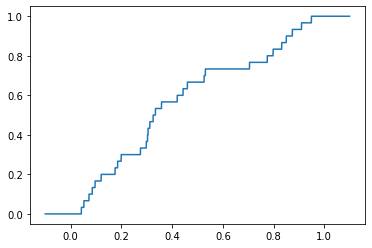

In [314]:
y = lambda x: EmpericFunc(x)
fig = plt.subplots()

x = np.linspace(-0.1, 1.1,10000)
#%matplotlib widget
plt.plot(x, y(x))
plt.show()

##Гистограмма)

(array([1.5       , 1.33333333, 0.83333333, 0.5       , 0.83333333]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

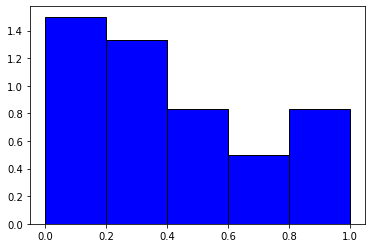

In [315]:
 
plt.hist(data, range = (0, 1), color = 'blue', edgecolor = 'black', bins = int(math.log2(30) + 1), density = 1)

#Четвертое задание


##Критерий Колмогорова

$D_n = sup|F_n^*(x) - F(x)|$

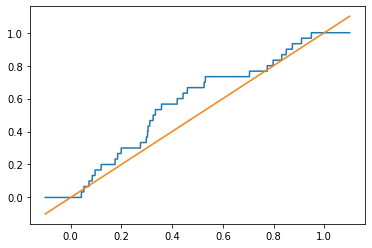

In [316]:
z = lambda x: x

plt.plot(x, y(x))
plt.plot(x, z(x))
plt.show()

In [317]:
point = 0
d = 0

for i in x:
  if (abs(y(i) - z(i)) > d):
    d = abs(y(i) - z(i))
    point = i  

print("D_n = ", d)
print("достигается в точке {:.3f}".format(point)) 

D_n =  0.2085808580858085
достигается в точке 0.358


$P(\sqrt{n} D_n < q) ≃ 𝒦(q) = 1 - 𝛆$

In [318]:
eps = 0.02
q = kstwobign.ppf(1 - eps) 
n = 30

if (math.sqrt(n) * d < q):
  print("Гипотезу принимаем")
else:
  print("Гипотезу не принимаем")    

Гипотезу принимаем


##Критерий хи-квадрат


$𝛹_n = \sum_{i = 1}^{k} \frac{(ν_i - np_i)^2}{np_i}$

$P(𝛹_n < y) → χ^2_{k-1}(y),  n → ∞$

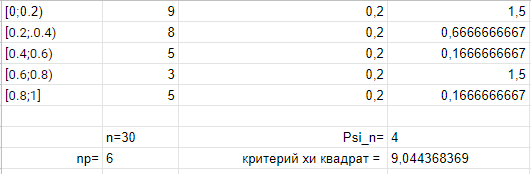)

Как видно из полученных данных $𝛹_n = 4 < 9.0443 = q$

Значит гипотезу принимаем
